<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/Tropical_cyclone_Accumulated_Cyclone_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACE (accumulated cyclone energy)

Data source from
    Global Tropical Cyclone Activity,
    Dr. Ryan N. Maue,
    https://policlimate.com/tropical/

sea surface temperature from pre-industrial times
    
source :
    US EPA climate change indicators
    https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature    


NOAA Named storm history
    https://www.nhc.noaa.gov/climo/images/AtlanticStormTotalsTable.pdf

In [72]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [ ]:
# upload files on google colab drive
from google.colab import files
uploaded = files.upload()

In [74]:
# reading csv file and text file
ace = pd.read_csv('tropical_storm_ace.txt', delimiter='\t', parse_dates=['MONTH'])
ss = pd.read_csv('sea_surface_temperature.txt')
ns = pd.read_csv('named_storms_history.csv').dropna()

In [75]:
ace.head

<bound method NDFrame.head of          MONTH    NEPAC      NATL  ...        NH        SH    GLOBAL
0   1970-01-01   0.0000    0.0000  ...    0.0000   34.3975   34.3975
1   1970-02-01   0.0000    0.0000  ...   21.2100  121.4605  142.6705
2   1970-03-01   0.0000    0.0000  ...    0.0000   38.1975   38.1975
3   1970-04-01   0.0000    0.0000  ...    0.0000    2.6850    2.6850
4   1970-05-01   1.2150    2.1950  ...    9.2275    0.6125    9.8400
..         ...      ...       ...  ...       ...       ...       ...
568 2017-05-01   0.5275    0.0000  ...    3.3800   28.9175   32.2975
569 2017-06-01   5.2300    2.3600  ...    8.6825    0.0000    8.6825
570 2017-07-01  66.2550    1.2150  ...  107.2350    0.0000  107.2350
571 2017-08-01  12.3000   25.0975  ...   87.8250    0.0000   87.8250
572 2017-09-01  13.3000  175.1450  ...  218.9696    0.0000  218.9696

[573 rows x 8 columns]>

In [76]:
ss.head

<bound method NDFrame.head of      Year  ...  Upper 95% confidence interval
0    1880  ...                      -0.267371
1    1881  ...                      -0.153169
2    1882  ...                      -0.169594
3    1883  ...                      -0.246082
4    1884  ...                      -0.389030
..    ...  ...                            ...
131  2011  ...                       0.724058
132  2012  ...                       0.824523
133  2013  ...                       0.880122
134  2014  ...                       1.046703
135  2015  ...                       1.231025

[136 rows x 4 columns]>

In [77]:
period = 4 ; base_year = [1970,1878]
ace['year_group'] = ace.apply(lambda x: 
        base_year[0]+period*(math.floor((x['MONTH'].year-base_year[0])/period)),axis=1)
ss['year_group'] = ss.apply(lambda x: 
        base_year[1]+period*(math.floor((x['Year']-base_year[1])/period)),axis=1)

In [78]:
ace_pvt = pd.pivot_table(ace,index=['year_group'],values=['GLOBAL'],aggfunc='mean').reset_index()
ss_pvt = pd.pivot_table(ss,index=['year_group'],values=['Annual anomaly'],aggfunc='mean').reset_index()
df = pd.merge(ace_pvt,ss_pvt,on='year_group')
df.rename(columns={'GLOBAL':'ACE','Annual anomaly':'sea surface temp+'},inplace=True)

In [79]:
# display data frame
df

,year_group,ACE,sea surface temp+
0,1970,61.839440,-0.313663
1,1974,44.844219,-0.335533
2,1978,57.863598,0.000764
3,1982,59.184300,-0.012208
4,1986,58.348796,0.118470
5,1990,75.729438,0.166613
6,1994,79.478813,0.239991
7,1998,56.452135,0.334827
8,2002,73.792344,0.504911
9,2006,52.052344,0.463203


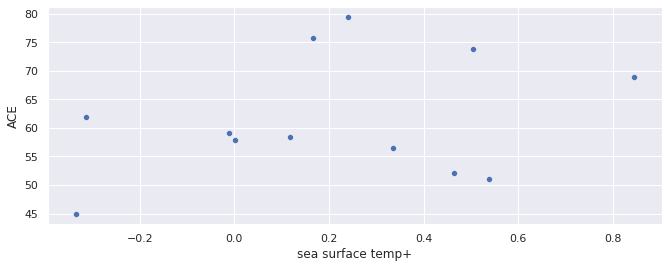

In [81]:
# display scatterplot of sea surface temp vs ACE
sb.scatterplot(x='sea surface temp+', y='ACE', data=df)

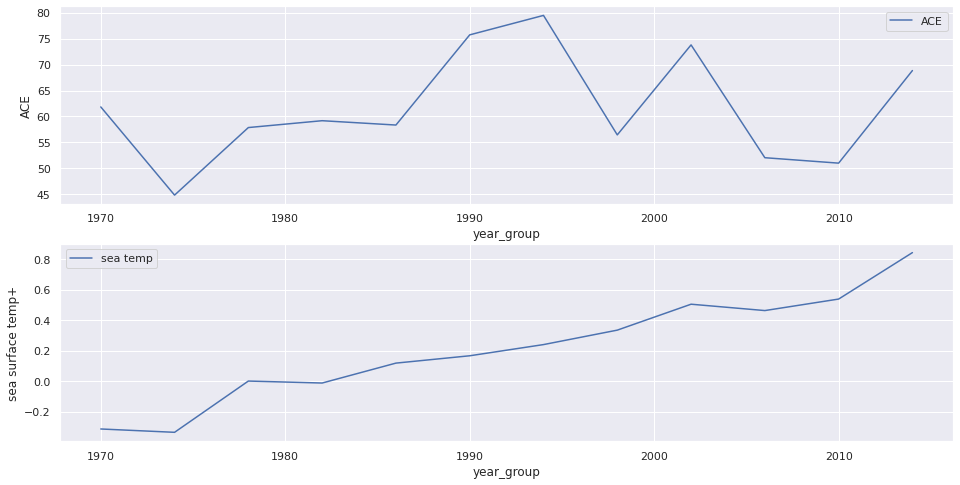

In [84]:
f, axes = plt.subplots(2,1,figsize=(16,8))
sb.lineplot(x='year_group',y='ACE',label='ACE',data=df,ax=axes.flat[0])
sb.lineplot(x='year_group',y='sea surface temp+',label='sea temp',data=df,ax=axes.flat[1])

In [85]:
ns['h-ratio'] = ns['Hurricanes']/ns['Tropical Storms']
ns['major'] = ns['Major Hurricanes']/ns['Tropical Storms']

In [86]:
ns.tail()

,Year,Tropical Storms,Hurricanes,Major Hurricanes,h-ratio,major
166,2014.0,8.0,6.0,2.0,0.750000,0.250000
167,2015.0,11.0,4.0,2.0,0.363636,0.181818
168,2016.0,15.0,7.0,4.0,0.466667,0.266667
169,2017.0,17.0,10.0,6.0,0.588235,0.352941
170,2018.0,15.0,8.0,2.0,0.533333,0.133333


In [40]:
ss.tail()

,Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
131,2011,0.428674,0.133289,0.724058
132,2012,0.528696,0.232869,0.824523
133,2013,0.584674,0.289227,0.880122
134,2014,0.751255,0.455808,1.046703
135,2015,0.935577,0.640129,1.231025


In [41]:
period = 12 ; base_year = [1854,1878]
ns['year_group'] = ns.apply(lambda x: 
        base_year[0]+period*(math.floor((x['Year']-base_year[0])/period)),axis=1)
ss['year_group'] = ss.apply(lambda x: 
        base_year[1]+period*(math.floor((x['Year']-base_year[1])/period)),axis=1)

In [42]:
ns.tail()

,Year,Tropical Storms,Hurricanes,Major Hurricanes,h-ratio,major,year_group
166,2014.0,8.0,6.0,2.0,0.750000,0.250000,2010
167,2015.0,11.0,4.0,2.0,0.363636,0.181818,2010
168,2016.0,15.0,7.0,4.0,0.466667,0.266667,2010
169,2017.0,17.0,10.0,6.0,0.588235,0.352941,2010
170,2018.0,15.0,8.0,2.0,0.533333,0.133333,2010


In [43]:
ns_pvt = pd.pivot_table(ns,index=['year_group'],values=['Tropical Storms','Major Hurricanes','major','h-ratio'],aggfunc='mean').reset_index()
ss_pvt = pd.pivot_table(ss,index=['year_group'],values=['Annual anomaly'],aggfunc='mean').reset_index()
df = pd.merge(ns_pvt,ss_pvt,on='year_group')
df.rename(columns={'Annual anomaly':'sea surface temp+'},inplace=True)

In [44]:
df.tail()

,year_group,Major Hurricanes,Tropical Storms,h-ratio,major,sea surface temp+
7,1962,1.916667,9.583333,0.592715,0.180526,-0.345942
8,1974,1.916667,9.500000,0.587733,0.205737,-0.115659
9,1986,1.916667,10.000000,0.530496,0.167805,0.175025
10,1998,3.666667,14.750000,0.512847,0.247487,0.434314
11,2010,3.000000,15.222222,0.485672,0.195967,0.640266


In [45]:
df.corr()

,year_group,Major Hurricanes,Tropical Storms,h-ratio,major,sea surface temp+
year_group,1.000000,0.674602,0.750101,-0.486867,0.237699,0.893114
Major Hurricanes,0.674602,1.000000,0.879687,-0.233819,0.779675,0.685774
Tropical Storms,0.750101,0.879687,1.000000,-0.292982,0.465059,0.850089
h-ratio,-0.486867,-0.233819,-0.292982,1.000000,0.064525,-0.284183
major,0.237699,0.779675,0.465059,0.064525,1.000000,0.230714
sea surface temp+,0.893114,0.685774,0.850089,-0.284183,0.230714,1.000000


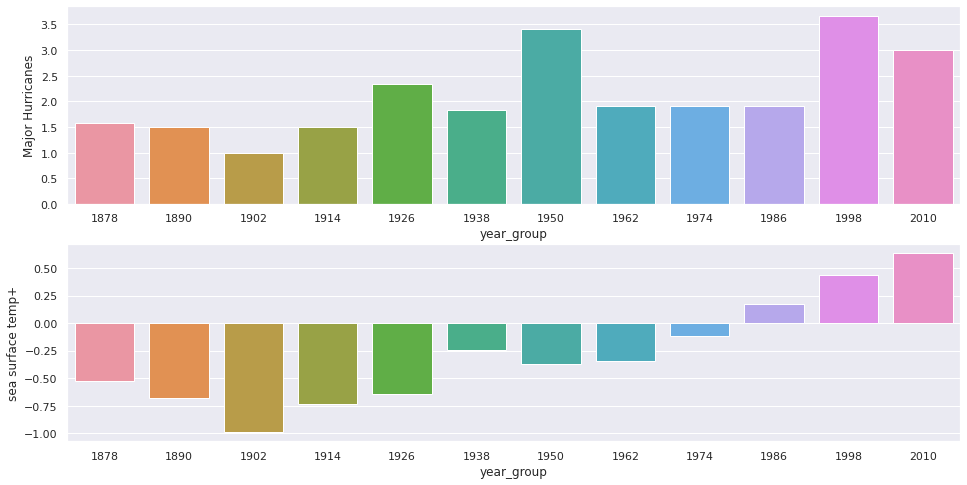

In [47]:
sb.set(rc={'figure.figsize':(16, 8)})
f, axes = plt.subplots(2,1,figsize=(16,8))
sb.barplot(x='year_group',y='Major Hurricanes',label='major hurricanes',data=df,ax=axes.flat[0])
sb.barplot(x='year_group',y='sea surface temp+',label='sea temp',data=df,ax=axes.flat[1])